In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/final_data.csv")

In [ ]:
y = pd.read_csv("/content/pha_map.csv")

In [ ]:
df

,H,diameter,albedo,rot_per,e,a,q,i,om,w,ma,ad,n,per,moid_ld
0,3.33,939.400000,0.090000,9.074170,0.0789,2.767,2.549,10.59,80.25,73.42,60.08,2.99,0.2141,1680.0,616.00
1,4.12,513.000000,0.155000,7.813221,0.2302,2.770,2.132,34.93,172.92,310.87,40.60,3.41,0.2138,1680.0,478.00
2,5.16,246.596000,0.214000,7.210000,0.2562,2.669,1.985,12.99,169.84,247.74,37.02,3.35,0.2260,1590.0,403.00
3,3.22,525.400000,0.422800,5.342128,0.0894,2.362,2.151,7.14,103.71,151.66,169.35,2.57,0.2715,1330.0,443.00
4,7.00,106.699000,0.274000,16.806000,0.1874,2.577,2.094,5.36,141.47,359.14,303.40,3.06,0.2383,1510.0,430.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1311958,26.23,-31.270931,0.116500,10.355228,0.2989,1.412,0.990,5.87,185.95,139.87,19.31,1.83,0.5876,613.0,9.53
1311959,23.36,-22.712515,0.076847,22.010418,0.2517,1.727,1.292,15.82,190.64,154.93,6.06,2.16,0.4344,829.0,117.00
1311960,18.04,-5.177840,0.090914,25.318527,0.2493,2.424,1.820,5.73,15.03,337.95,252.37,3.03,0.2611,1380.0,318.00
1311961,18.50,-7.014612,0.090800,26.064191,0.2824,2.336,1.676,8.08,355.23,5.25,231.41,3.00,0.2761,1300.0,262.00


In [ ]:
X = df.drop(columns=['albedo', 'rot_per', 'e', 'a', 'q', 'om', 'w', 'ma', 'ad'])

In [ ]:
!pip install imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 2.2 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, f1_score, roc_curve, ConfusionMatrixDisplay, RocCurveDisplay
from imblearn.metrics import sensitivity_specificity_support, classification_report_imbalanced
from imblearn.over_sampling import BorderlineSMOTE, SVMSMOTE

In [ ]:
bs = BorderlineSMOTE(random_state=42)
X_resampled, y_resampled = bs.fit_resample(X, y)

In [ ]:
X_resampled.shape

(2619186, 6)

In [ ]:
y_resampled.value_counts()

pha
0      1309593
1      1309593
Name: count, dtype: int64

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled, test_size=0.2, random_state=43)

In [ ]:
y_train.value_counts()

pha
1      1048325
0      1047023
Name: count, dtype: int64

In [ ]:
y_test.value_counts()

pha
0      262570
1      261268
Name: count, dtype: int64

In [ ]:
!pip install dask

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 5.7 MB/s eta 0:00:00
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.6.4
    Uninstalling importlib-metadata-4.6.4:
      Successfully uninstalled importlib-metadata-4.6.4


In [ ]:
!python -m pip install dask distributed --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 4.5 MB/s eta 0:00:00


In [ ]:
from dask.distributed import Client
client = Client(n_workers=32)
client

INFO:distributed.http.proxy:To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:35969
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:8787/status
INFO:distributed.scheduler:Registering Worker plugin shuffle
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:40531'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:33065'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:42473'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:36551'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:37507'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:38131'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:42727'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:43159'
INFO:distributed.nanny:        Start Na

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 32
Total threads: 96,Total memory: 334.56 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:35969,Workers: 32
Dashboard: http://127.0.0.1:8787/status,Total threads: 96
Started: Just now,Total memory: 334.56 GiB
Comm: tcp://127.0.0.1:39005,Total threads: 3
Dashboard: http://127.0.0.1:35499/status,Memory: 10.46 GiB
Nanny: tcp://127.0.0.1:40531,


In [ ]:
import joblib

In [ ]:
y_train = y_train.squeeze()
y_train

1205167    0
575514     0
1212305    0
1847891    1
1411332    1
          ..
1106227    0
1525776    1
1439802    1
2484501    1
1613617    1
Name: pha, Length: 2095348, dtype: int64

In [ ]:
rf = RandomForestClassifier()
with joblib.parallel_backend("dask", scatter=[X_train,y_train]):
    rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

INFO:distributed.scheduler:Receive client connection: Client-worker-8dd03d26-3f4d-11ef-a458-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:34516
INFO:distributed.scheduler:Receive client connection: Client-worker-8dcf217a-3f4d-11ef-a425-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:34522
INFO:distributed.scheduler:Receive client connection: Client-worker-8e285f63-3f4d-11ef-a467-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:34526
INFO:distributed.scheduler:Receive client connection: Client-worker-8e3380bc-3f4d-11ef-a463-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:34536
INFO:distributed.scheduler:Receive client connection: Client-worker-8e34f8ec-3f4d-11ef-a449-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:34540
INFO:distributed.scheduler:Receive client connection: Client-worker-8e35f9e1-3f4

In [ ]:
accuracy_score(y_test,y_pred)

0.9999770921544447

In [ ]:
confusion_matrix(y_test,y_pred)

array([[262558,     12],
       [     0, 261268]])

In [ ]:
print(classification_report_imbalanced(y_test,y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      1.00    262570
          1       1.00      1.00      1.00      1.00      1.00      1.00    261268

avg / total       1.00      1.00      1.00      1.00      1.00      1.00    523838



In [ ]:
print(sensitivity_specificity_support(y_test, y_pred))

(array([0.9999543, 1.       ]), array([1.       , 0.9999543]), array([262570, 261268]))


In [ ]:
model = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 20, 30, 50]
}

rand = RandomizedSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [ ]:
with joblib.parallel_backend("dask", scatter=[X_train,y_train]):
    rand.fit(X_train,y_train)

In [ ]:
rand.best_params_

{'n_estimators': 100, 'max_depth': 50}

In [ ]:
rand.best_score_

0.9999665926614576

In [ ]:
##Training with best parameters
rfbest = RandomForestClassifier(n_estimators= 100, max_depth= 50)
with joblib.parallel_backend("dask", scatter=[X_train,y_train]):
    rfbest.fit(X_train,y_train)

In [ ]:
y_pred = rfbest.predict(X_test)

In [ ]:
print(classification_report_imbalanced(y_test,y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      1.00    262570
          1       1.00      1.00      1.00      1.00      1.00      1.00    261268

avg / total       1.00      1.00      1.00      1.00      1.00      1.00    523838



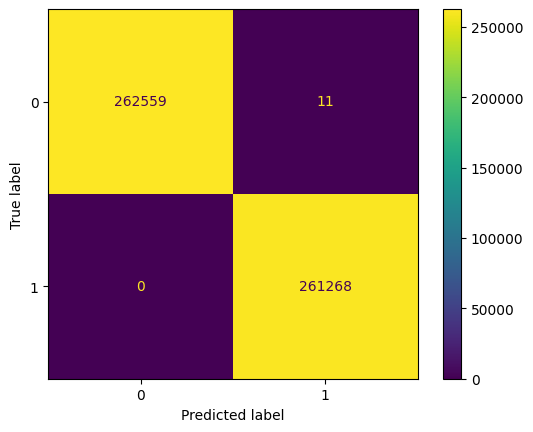

In [ ]:
##Plotting Confusion matrix

cm = confusion_matrix(y_test, y_pred, labels=rfbest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rfbest.classes_)
disp.plot()
plt.show()

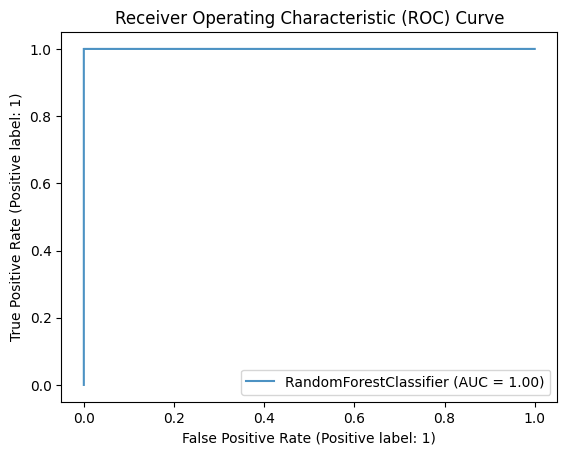

In [ ]:
##Plotting ROC Curve

ax = plt.gca()
roc_display = RocCurveDisplay.from_estimator(rfbest, X_test, y_test, ax=ax, alpha=0.8)
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

In [ ]:
print(sensitivity_specificity_support(y_test, y_pred))

(array([0.99995811, 1.        ]), array([1.        , 0.99995811]), array([262570, 261268]))


In [ ]:
print(sensitivity_specificity_support(y_test, y_pred, average='macro'))

(0.9999790532048596, 0.9999790532048596, None)


In [ ]:
print(sensitivity_specificity_support(y_test, y_pred, average='micro'))

(0.9999790011415743, 0.9999790011415743, None)


In [ ]:
print(sensitivity_specificity_support(y_test, y_pred, average='weighted'))

(0.9999790011415743, 0.999979105268145, None)


In [ ]:
abc = AdaBoostClassifier()
abc.fit(X_train,y_train)
y_pred = abc.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9998740068494458

In [ ]:
confusion_matrix(y_test,y_pred)

array([[262508,     62],
       [     4, 261264]])

In [ ]:
roc_auc_score(y_test,y_pred)

0.9998742812706044

In [ ]:
abc = AdaBoostClassifier()
param_grid = {
    'n_estimators' : [100, 200, 300, 500],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 1],
}

rand5 = RandomizedSearchCV(abc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [ ]:
with joblib.parallel_backend("dask", scatter=[X_train,y_train]):
    rand5.fit(X_train,y_train)

In [ ]:
rand5.best_params_

{'n_estimators': 500, 'learning_rate': 1}

In [ ]:
rand5.best_score_

0.9999455937579345

In [ ]:
##Training with best parameters
adabest = AdaBoostClassifier(n_estimators=500, learning_rate=1)
with joblib.parallel_backend("dask", scatter=[X_train,y_train]):
    adabest.fit(X_train,y_train)

y_pred = adabest.predict(X_test)

In [ ]:
print(classification_report_imbalanced(y_test,y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      1.00    262570
          1       1.00      1.00      1.00      1.00      1.00      1.00    261268

avg / total       1.00      1.00      1.00      1.00      1.00      1.00    523838



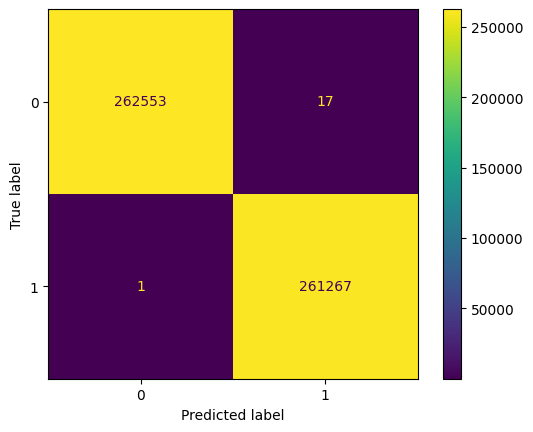

In [ ]:
##Plotting Confusion matrix

cm = confusion_matrix(y_test, y_pred, labels=adabest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=adabest.classes_)
disp.plot()
plt.show()

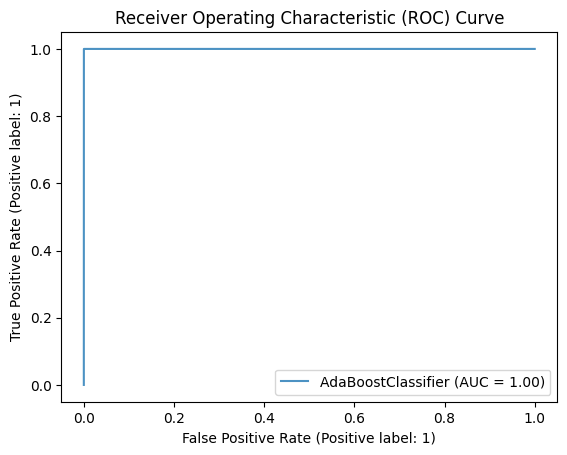

In [ ]:
##Plotting ROC Curve

ax = plt.gca()
roc_display = RocCurveDisplay.from_estimator(adabest, X_test, y_test, ax=ax, alpha=0.8)
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

In [ ]:
print(sensitivity_specificity_support(y_test, y_pred))

(array([0.99993526, 0.99999617]), array([0.99999617, 0.99993526]), array([262570, 261268]))


In [ ]:
print(sensitivity_specificity_support(y_test, y_pred, average='macro'))

(0.9999657139364957, 0.9999657139364957, None)


In [ ]:
print(sensitivity_specificity_support(y_test, y_pred, average='micro'))

(0.9999656382316671, 0.9999656382316671, None)


In [ ]:
print(sensitivity_specificity_support(y_test, y_pred, average='weighted'))

(0.9999656382316671, 0.9999657896413242, None)


# Oversampling with SVMSmote

In [ ]:
svm = SVMSMOTE(random_state=42)
X_resampled, y_resampled = svm.fit_resample(X, y)

In [ ]:
y_resampled.value_counts()

pha
0      1309593
1      1309593
Name: count, dtype: int64

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled, test_size=0.2, random_state=43)

In [ ]:
y_train.value_counts()

pha
1      1048325
0      1047023
Name: count, dtype: int64

In [ ]:
y_test.value_counts()

pha
0      262570
1      261268
Name: count, dtype: int64

In [ ]:
y_train = y_train.squeeze()
y_train

1205167    0
575514     0
1212305    0
1847891    1
1411332    1
          ..
1106227    0
1525776    1
1439802    1
2484501    1
1613617    1
Name: pha, Length: 2095348, dtype: int64

In [ ]:
rf = RandomForestClassifier()
with joblib.parallel_backend("dask", scatter=[X_train,y_train]):
    rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.999780466480095

In [ ]:
confusion_matrix(y_test,y_pred)

array([[262456,    114],
       [     1, 261267]])

In [ ]:
print(classification_report_imbalanced(y_test,y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      1.00    262570
          1       1.00      1.00      1.00      1.00      1.00      1.00    261268

avg / total       1.00      1.00      1.00      1.00      1.00      1.00    523838



In [ ]:
print(sensitivity_specificity_support(y_test, y_pred))

(array([0.99956583, 0.99999617]), array([0.99999617, 0.99956583]), array([262570, 261268]))


In [ ]:
model = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 20, 30, 50]
}

rand = RandomizedSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [ ]:
with joblib.parallel_backend("dask", scatter=[X_train,y_train]):
    rand.fit(X_train,y_train)

In [ ]:
rand.best_params_

{'n_estimators': 100, 'max_depth': 50}

In [ ]:
rand.best_score_

0.9997709210946109

In [ ]:
##Training with best parameters
rfbest = RandomForestClassifier(n_estimators= 100, max_depth= 50)
with joblib.parallel_backend("dask", scatter=[X_train,y_train]):
    rfbest.fit(X_train,y_train)

In [ ]:
y_pred = rfbest.predict(X_test)

In [ ]:
print(classification_report_imbalanced(y_test,y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      1.00    262570
          1       1.00      1.00      1.00      1.00      1.00      1.00    261268

avg / total       1.00      1.00      1.00      1.00      1.00      1.00    523838



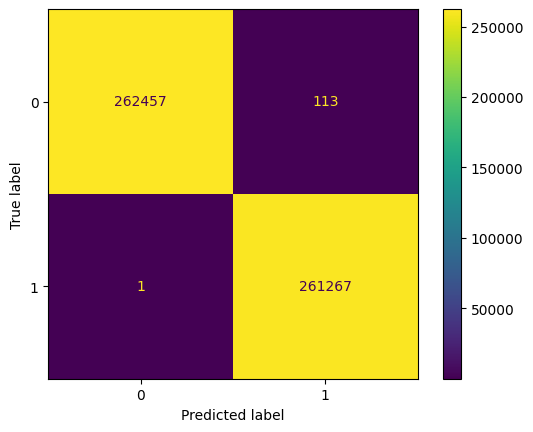

In [ ]:
##Plotting Confusion matrix

cm = confusion_matrix(y_test, y_pred, labels=rfbest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rfbest.classes_)
disp.plot()
plt.show()

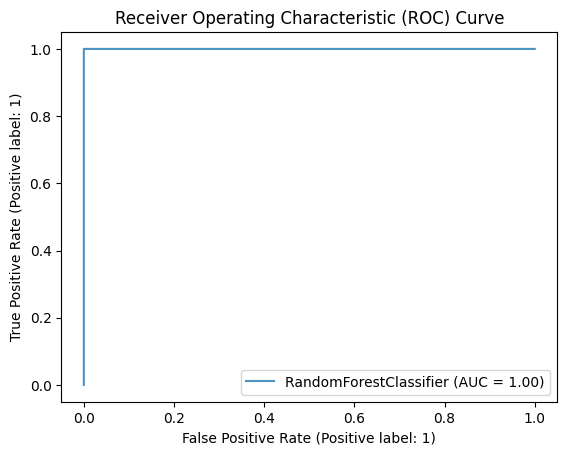

In [ ]:
##Plotting ROC Curve

ax = plt.gca()
roc_display = RocCurveDisplay.from_estimator(rfbest, X_test, y_test, ax=ax, alpha=0.8)
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

In [ ]:
print(sensitivity_specificity_support(y_test, y_pred))

(array([0.99956964, 0.99999617]), array([0.99999617, 0.99956964]), array([262570, 261268]))


In [ ]:
print(sensitivity_specificity_support(y_test, y_pred, average='macro'))

(0.9997829055425436, 0.9997829055425436, None)


In [ ]:
print(sensitivity_specificity_support(y_test, y_pred, average='micro'))

(0.9997823754672246, 0.9997823754672246, None)


In [ ]:
print(sensitivity_specificity_support(y_test, y_pred, average='weighted'))

(0.9997823754672246, 0.9997834356178623, None)


In [ ]:
abc = AdaBoostClassifier()
abc.fit(X_train,y_train)
y_pred = abc.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9991619546501017

In [ ]:
confusion_matrix(y_test,y_pred)

array([[262229,    341],
       [    98, 261170]])

In [ ]:
roc_auc_score(y_test,y_pred)

0.9991631024639278